In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
data=pd.read_csv("C:\\Users\\ASUS\\Downloads\\amazon_sales_dataset.csv")
data=data[data.Store==1]
data=data[ data.Dept==1]
data=data.drop(["max","min","mean","median","std","Unnamed: 3","Type"],axis=1)
data=data.reset_index()
Q1 = np.percentile(data.Weekly_Sales, 25,
                interpolation = 'midpoint')
 
Q3 = np.percentile(data.Weekly_Sales, 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
    
 


# Upper bound
upper = np.where(data.Weekly_Sales >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data.Weekly_Sales <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
data=data.reset_index()
data["y"]=data.Weekly_Sales
data['Time'] = np.arange(len(data.Date))
#data.index=data.ds
data.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23332\340599962.py:8: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data.Weekly_Sales, 25,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23332\340599962.py:11: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(data.Weekly_Sales, 75,


,level_0,index,Date,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,Total_MarkDown,y,Time
0,0,0,05/02/2019,1,1,24924.50,151315,42.31,2.572,211.096358,8.106,0,2019,2,5,0.0,24924.50,0
1,3,8759,26/02/2019,1,1,19403.54,151315,46.63,2.561,211.319643,8.106,0,2019,2,8,0.0,19403.54,1
2,4,12901,05/03/2019,1,1,21827.90,151315,46.50,2.625,211.350143,8.106,0,2019,3,9,0.0,21827.90,2
3,5,15145,12/03/2019,1,1,21043.39,151315,57.79,2.667,211.380643,8.106,0,2019,3,10,0.0,21043.39,3
4,6,16555,19/03/2019,1,1,22136.64,151315,54.58,2.720,211.215635,8.106,0,2019,3,11,0.0,22136.64,4


In [3]:
data["ds"] = pd.to_datetime(data.Date,format='%d/%m/%Y')
data["ds"]=data["ds"].dt.strftime('%d/%m/%Y')

In [4]:
df=data[["ds","y"]]
df.index=df["ds"]
df

,ds,y
ds,,
05/02/2019,05/02/2019,24924.50
26/02/2019,26/02/2019,19403.54
05/03/2019,05/03/2019,21827.90
12/03/2019,12/03/2019,21043.39
19/03/2019,19/03/2019,22136.64
...,...,...
28/09/2021,28/09/2021,18947.81
05/10/2021,05/10/2021,21904.47
12/10/2021,12/10/2021,22764.01


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23332\1217560050.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['ds'], dtype='object')
  rolling_mean = rolling.mean()


<AxesSubplot:xlabel='ds'>

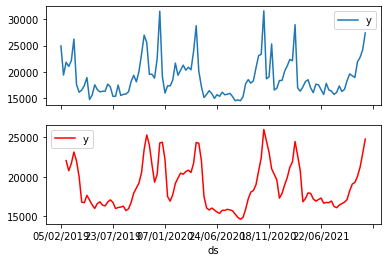

In [5]:
fig, axes = plt.subplots(2, 1, sharex=True)
df.plot(ax=axes[0])
rolling = df.rolling(window=3)
rolling_mean = rolling.mean()
rolling_mean.plot(color="red", ax=axes[1])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23332\2298198985.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['ds'], dtype='object')
  rolling_mean = rolling.mean()


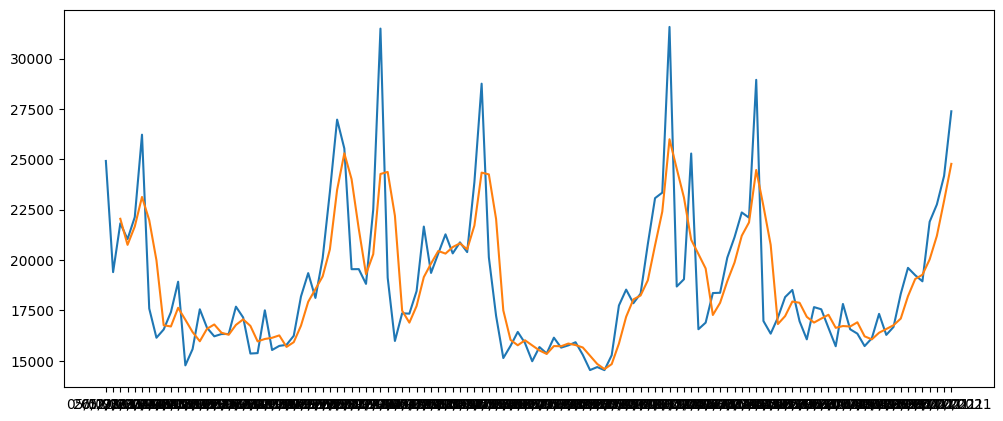

In [6]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df.y)
rolling = df.rolling(window=3)
rolling_mean = rolling.mean()
rolling_mean=rolling_mean.dropna()
plt.plot(rolling_mean.y)

In [7]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(rolling_mean)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -2.372117
p-value: 0.149761


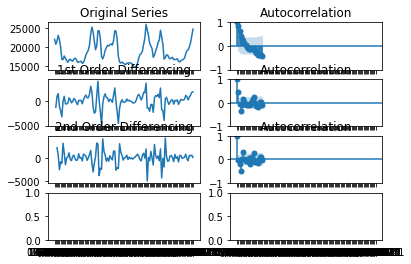

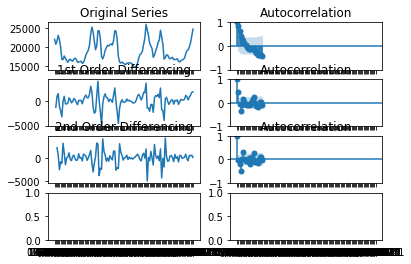

In [8]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
# Original Series
fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(rolling_mean.index,rolling_mean.y); axes[0, 0].set_title('Original Series')
plot_acf(rolling_mean.y, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(rolling_mean.index,rolling_mean.y.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(rolling_mean.y.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(rolling_mean.index,rolling_mean.y.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(rolling_mean.y.diff().diff().dropna(), ax=axes[2, 1])



C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


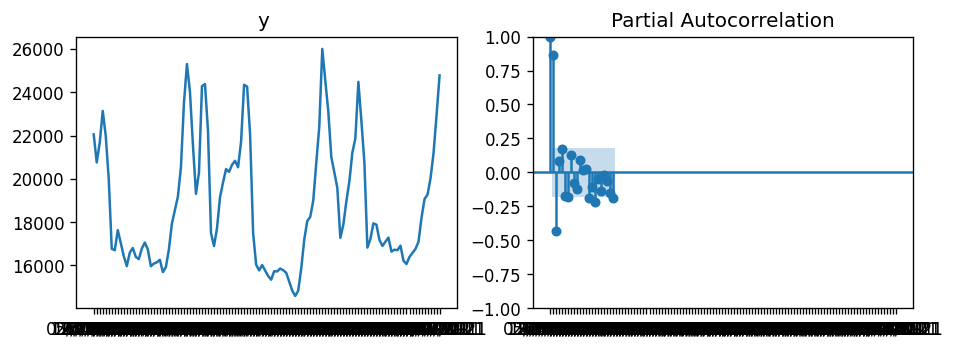

In [9]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(rolling_mean.y); axes[0].set_title('y ')
axes[1].set(ylim=(0,5))
plot_pacf(rolling_mean.y.dropna(), ax=axes[1])

plt.show()

In [10]:
import statsmodels.api as sm


In [11]:
model = sm.tsa.arima.ARIMA(rolling_mean.y, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '19/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '26/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '16/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index =

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  116
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -991.281
Date:                Tue, 20 Dec 2022   AIC                           1990.562
Time:                        06:39:22   BIC                           2001.542
Sample:                             0   HQIC                          1995.019
                                - 116                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3858      0.717     -0.538      0.590      -1.791       1.019
ma.L1          0.5946      0.722      0.823      0.410      -0.821       2.010
ma.L2          0.1381      0.135      1.022      0.3

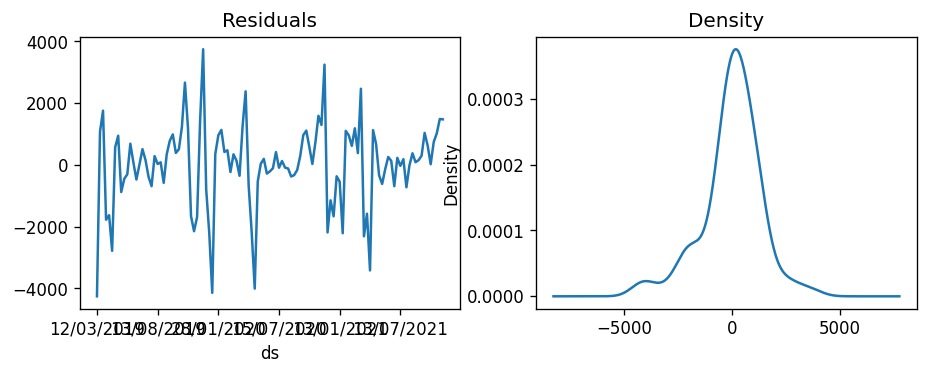

In [12]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

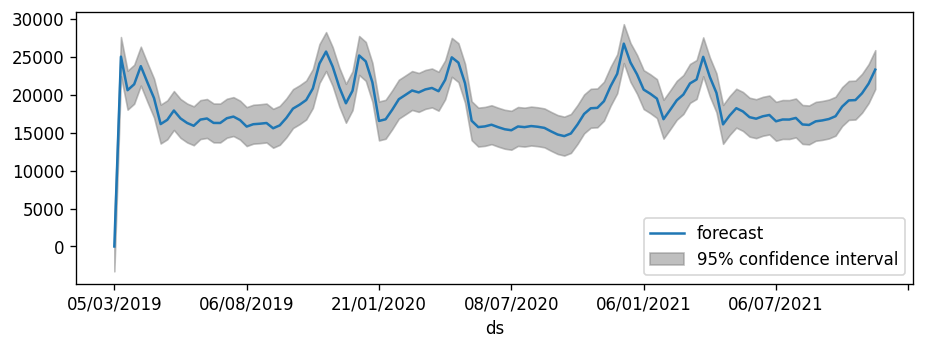

In [13]:
from statsmodels.graphics.tsaplots import plot_predict


plot_predict(model_fit,dynamic=False)
plt.show()

In [14]:
tr=df[:90]
test=df[90:]
tr

,ds,y
ds,,
05/02/2019,05/02/2019,24924.50
26/02/2019,26/02/2019,19403.54
05/03/2019,05/03/2019,21827.90
12/03/2019,12/03/2019,21043.39
19/03/2019,19/03/2019,22136.64
...,...,...
27/01/2021,27/01/2021,18378.16
24/02/2021,24/02/2021,20124.22
09/03/2021,09/03/2021,21140.07


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '26/02/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '19/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '26/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index =

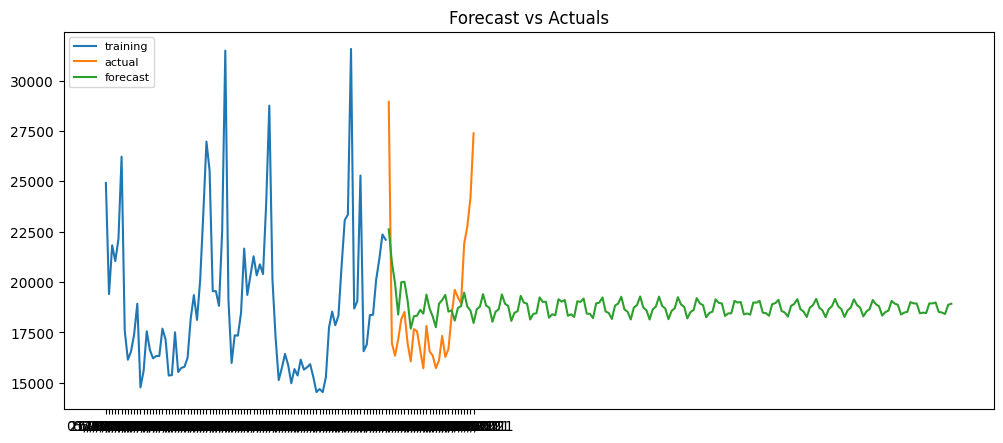

In [15]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = sm.tsa.arima.ARIMA(tr.y, order=(12, 1, 7))  
fitted = model.fit()  

# Forecast
fc= fitted.forecast(180, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc)


# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(tr.y, label='training')
plt.plot(test.y, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23332\3722811277.py:3: UserWarning: Parsing '26/02/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exog = exog.set_index(pd.PeriodIndex(exog['date'], freq='M'))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23332\3722811277.py:3: UserWarning: Parsing '19/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exog = exog.set_index(pd.PeriodIndex(exog['date'], freq='M'))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23332\3722811277.py:3: UserWarning: Parsing '26/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exog = exog.set_index(pd.PeriodIndex(exog['date'], freq='M'))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23332\3722811277.py:3: UserWarning: Parsing '16/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exog = exo

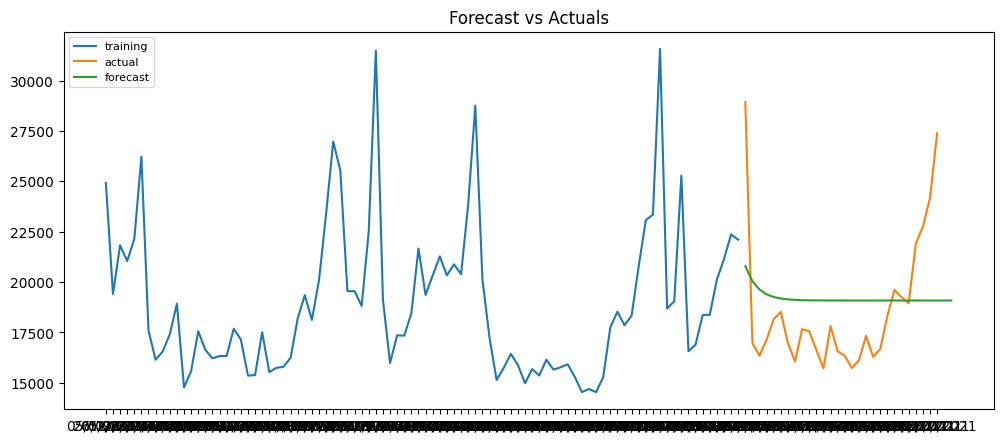

In [16]:
from pmdarima import auto_arima
exog = pd.DataFrame({'date': df.index})
exog = exog.set_index(pd.PeriodIndex(exog['date'], freq='M'))
exog['sin365'] = np.sin(2 * np.pi * exog.index.dayofyear / 365.25)
exog['cos365'] = np.cos(2 * np.pi * exog.index.dayofyear / 365.25)
exog['sin365_2'] = np.sin(4 * np.pi * exog.index.dayofyear / 365.25)
exog['cos365_2'] = np.cos(4 * np.pi * exog.index.dayofyear / 365.25)
exog = exog.drop(columns=['date'])
exog_to_train = exog.iloc[:(len(data.y)-38)]
exog_to_test = exog.iloc[(len(data.y)-38):]
arima_exog_model = auto_arima(y=tr.y, exogenous=exog_to_train, seasonal=True, m=4)# Forecast
y_arima_exog_forecast = arima_exog_model.predict(n_periods=30, exogenous=exog_to_test)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(tr.y, label='training')
plt.plot(test.y, label='actual')
plt.plot(y_arima_exog_forecast, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [17]:
df

,ds,y
ds,,
05/02/2019,05/02/2019,24924.50
26/02/2019,26/02/2019,19403.54
05/03/2019,05/03/2019,21827.90
12/03/2019,12/03/2019,21043.39
19/03/2019,19/03/2019,22136.64
...,...,...
28/09/2021,28/09/2021,18947.81
05/10/2021,05/10/2021,21904.47
12/10/2021,12/10/2021,22764.01


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


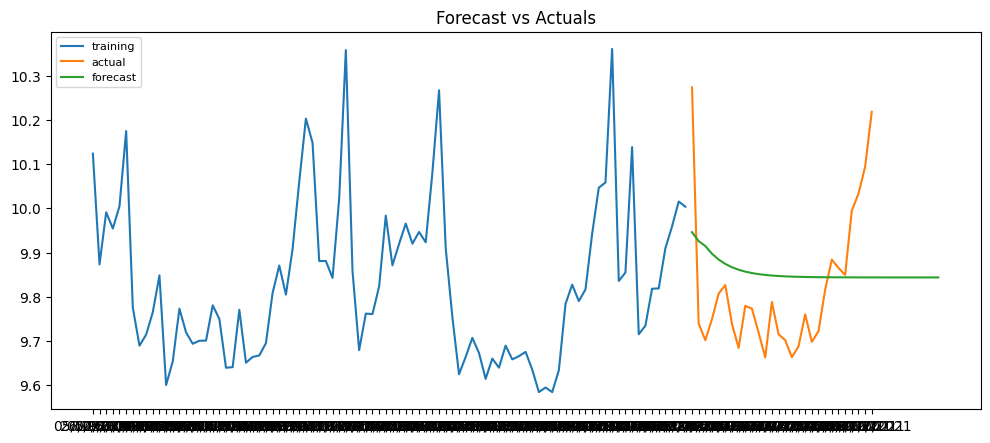

In [18]:
from pmdarima import auto_arima
arima_model = auto_arima(np.log(tr.y), seasonal=True, D=7)
y_arima_forecast = arima_model.predict(n_periods=38)
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(np.log(tr.y), label='training')
plt.plot(np.log(test.y), label='actual')
plt.plot(y_arima_forecast, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [19]:
model_autoarima = auto_arima(df["y"].diff().dropna(), seasonal=True,m=7)
#m = 7 as data contains daily observations
model_autoarima.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  117
Model:             SARIMAX(1, 0, 2)x(1, 0, [1], 7)   Log Likelihood               -1099.125
Date:                             Tue, 20 Dec 2022   AIC                           2210.250
Time:                                     06:39:47   BIC                           2226.823
Sample:                                          0   HQIC                          2216.978
                                             - 117                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5203      0.236     -2.207      0.027      -0.982      -0.058
ma.L1          0.1991      0.223      0.894      0.372      -0.238       0.636
ma.L2         -0.4940      0.094     -5.254      0.000      -0.678      -0.310
ar.S.L7       -0.8830      0.180     -4.903      0.000      -1.236      -0.530
ma.S.L7        0.7476      0.248      3.012      0.003       0.261       1.234
sigma2       8.85e+06   9.19e+05      9.634      0.000    7.05e+06    1.07e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                35.48
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.08
Prob(H) (two-sided):                  0.83   Kurtosis:                         5.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
import statsmodels.api as sm

In [21]:
model=sm.tsa.statespace.SARIMAX(tr.y.diff(),order=(1,0,2),seasonal_order=(1,0,[1],7))
results=model.fit()

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '26/02/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '19/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '26/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index =

In [22]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
adf_test(rolling_mean.y)
kpss_test(rolling_mean.y)
def obtain_adf_kpss_results(timeseries, max_d):
    """ Build dataframe with ADF statistics and p-value for time series after applying difference on time series
    
    Args:
        time_series (df): Dataframe of univariate time series  
        max_d (int): Max value of how many times apply difference
        
    Returns:
        Dataframe showing values of ADF statistics and p when applying ADF test after applying d times 
        differencing on a time-series.
    
    """
    
    results=[]

    for idx in range(max_d):
        adf_result = adfuller(timeseries, autolag='AIC')
        kpss_result = kpss(timeseries, regression='c', nlags="auto")
        timeseries = timeseries.diff().dropna()
        if adf_result[1] <=0.05:
            adf_stationary = True
        else:
            adf_stationary = False
        if kpss_result[1] <=0.05:
            kpss_stationary = False
        else:
            kpss_stationary = True
            
        stationary = adf_stationary & kpss_stationary
            
        results.append((idx,adf_result[1], kpss_result[1],adf_stationary,kpss_stationary, stationary))
    
    # Construct DataFrame 
    results_df = pd.DataFrame(results, columns=['d','adf_stats','p-value', 'is_adf_stationary','is_kpss_stationary','is_stationary' ])
    
    return results_df
obtain_adf_kpss_results(rolling_mean.y, 3)

Results of Dickey-Fuller Test:
Test Statistic                  -2.372117
p-value                          0.149761
#Lags Used                       9.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64
Results of KPSS Test:
Test Statistic           0.056677
p-value                  0.100000
Lags Used                5.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The 

,d,adf_stats,p-value,is_adf_stationary,is_kpss_stationary,is_stationary
0,0,1.497613e-01,0.1,False,True,False
1,1,1.604036e-04,0.1,True,True,True
2,2,9.631744e-07,0.1,True,True,True


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


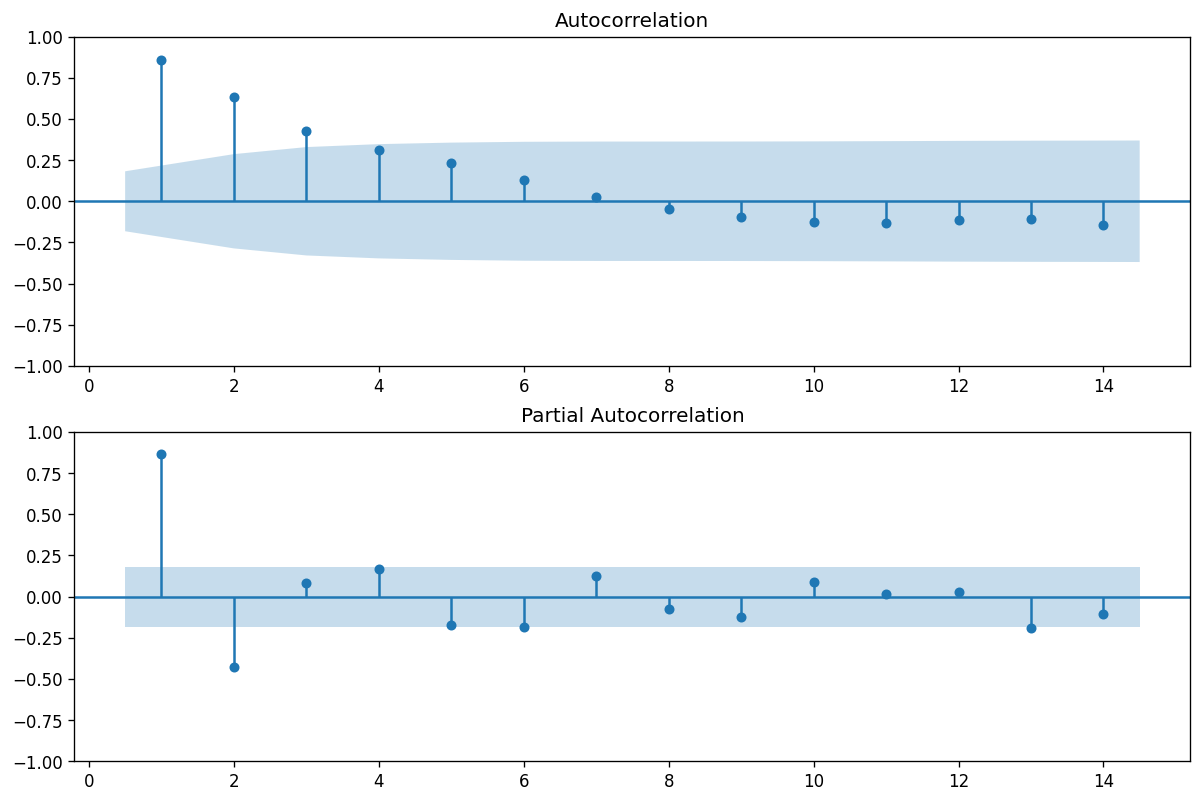

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df_store_2_item_28_timeon ax1
plot_acf(rolling_mean.y,lags=14, zero=False, ax=ax1)

# Plot the PACF of df_store_2_item_28_timeon ax2
plot_pacf(rolling_mean.y,lags=14, zero=False, ax=ax2)

plt.show()

In [24]:
# ARIMA LİBRARY
from statsmodels.tsa.arima_model import ARIMA


# fit model
model = sm.tsa.arima.ARIMA(tr.y, order=(1,1,3)) # (ARMA) = (1,0,1)
model_fit = model.fit()

# predict

forecast = model_fit.predict(test)

# visualization
plt.figure(figsize=(22,10))
plt.plot(df,label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '26/02/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '19/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '26/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index =

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [ ]:
test

ds
02/09/2020    15277.27
09/09/2020    17746.68
16/09/2020    18535.48
23/09/2020    17859.30
30/09/2020    18337.68
07/10/2020    20797.58
14/10/2020    23077.55
21/10/2020    23351.80
28/10/2020    31579.90
11/11/2020    18689.54
18/11/2020    19050.66
02/12/2020    25293.49
06/01/2021    16567.69
13/01/2021    16894.40
20/01/2021    18365.10
27/01/2021    18378.16
24/02/2021    20124.22
09/03/2021    21140.07
16/03/2021    22366.88
23/03/2021    22107.70
30/03/2021    28952.86
20/04/2021    16976.19
27/04/2021    16347.60
04/05/2021    17147.44
11/05/2021    18164.20
18/05/2021    18517.79
25/05/2021    16963.55
01/06/2021    16065.49
08/06/2021    17666.00
15/06/2021    17558.82
22/06/2021    16633.41
29/06/2021    15722.82
06/07/2021    17823.37
13/07/2021    16566.18
20/07/2021    16348.06
27/07/2021    15731.18
10/08/2021    16119.92
17/08/2021    17330.70
24/08/2021    16286.40
31/08/2021    16680.24
07/09/2021    18322.37
14/09/2021    19616.22
21/09/2021    19251.50
28/09/20

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# just an example
model = SARIMAX(df.y, order=(3,1,1),m=180)
results = model.fit()
# statistics of the model
results.summary()

WARNING - (py.warnings._showwarnmsg) - C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '26/02/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)

WARNING - (py.warnings._showwarnmsg) - C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '19/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)

WARNING - (py.warnings._showwarnmsg) - C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '26

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  118
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -1101.941
Date:                Tue, 20 Dec 2022   AIC                           2213.883
Time:                        05:41:07   BIC                           2227.694
Sample:                             0   HQIC                          2219.490
                                - 118                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5645      0.098      5.758      0.000       0.372       0.757
ar.L2          0.0486      0.098      0.497      0.619      -0.143       0.240
ar.L3          0.0831      0.087      0.954      0.340      -0.088       0.254
ma.L1         -0.9898      0.098    -10.146      0.000      -1.181      -0.799
sigma2      9.401e+06   7.39e-09   1.27e+15      0.000     9.4e+06     9.4e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                32.09
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             0.40
Prob(H) (two-sided):                  0.69   Kurtosis:                         5.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.65e+30. Standard errors may be unstable.
"""

In [ ]:
test=pd.DataFrame(test)
test

,y
ds,
27/04/2021,20758.883333
04/05/2021,16823.743333
11/05/2021,17219.746667
18/05/2021,17943.143333
25/05/2021,17881.846667
01/06/2021,17182.276667
08/06/2021,16898.346667
15/06/2021,17096.770000
22/06/2021,17286.076667


In [28]:
y = rolling_mean.y
from pmdarima.model_selection import train_test_split
train, test = train_test_split(y, train_size=90)

# make your forecasts
forecasts = model.predict(test)  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y.shape[0])
plt.plot(x[:70], train, c='blue')
plt.plot(x[70:], forecasts, c='green')
plt.plot(x[70:],test,c="red")
plt.show()

NotImplementedError: 

In [30]:
import pmdarima as pm

# Create auto_arima model
model1 = pm.auto_arima(df.y,
                      p=1,
                      q=3,
                      d=1, #time series
                      seasonal=True, # is the time series seasonal
                      information_criterion='aic', # used to select best mode
                      trace=True, # prints the information_criterion for each model it fits
                      error_action='ignore', # ignore orders that don't work
                      stepwise=True, # apply an intelligent order search
                      suppress_warnings=True) 

# Print model summary
print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2218.850, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2230.815, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2222.988, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2218.190, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2228.824, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2216.677, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2217.646, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2218.896, Time=0.04 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2219.365, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2214.897, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2216.332, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2215.827, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=2216.880, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : 

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


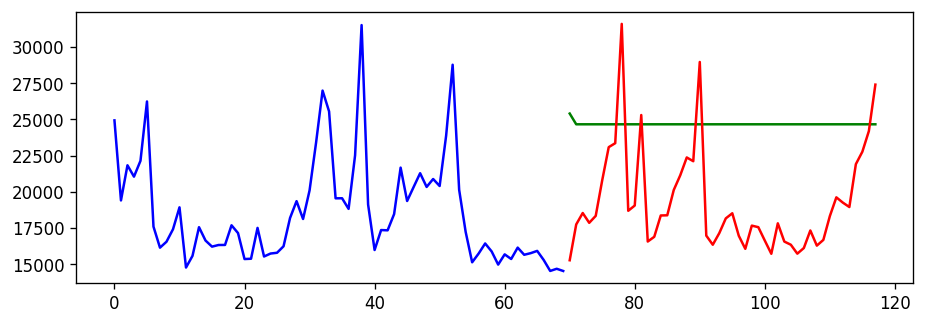

In [31]:
from pmdarima.model_selection import train_test_split
# Load/split your data
y = df.y
train, test = train_test_split(y, train_size=70)


model1.summary()
# make your forecasts
forecasts = model1.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y.shape[0])
plt.plot(x[:70], train, c='blue')
plt.plot(x[70:], forecasts, c='green')
plt.plot(x[70:],test,c="red")
plt.show()

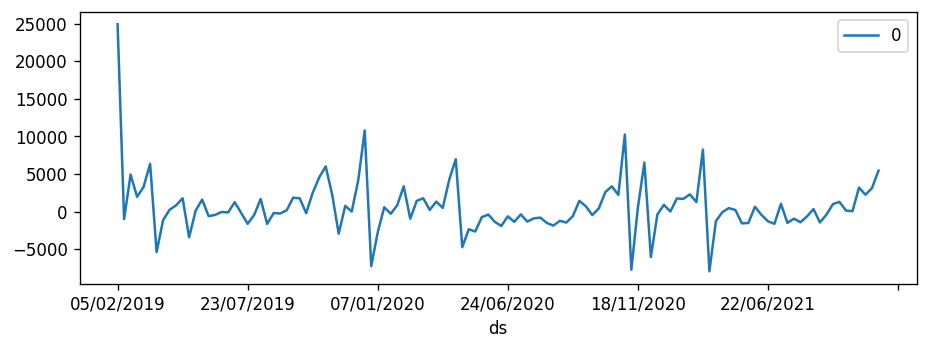

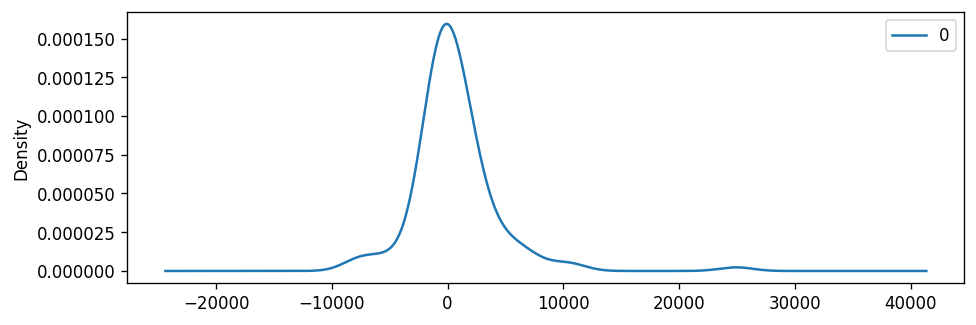

                  0
count    118.000000
mean     633.240889
std     3730.020381
min    -7942.511123
25%    -1102.433098
50%       84.817985
75%     1737.538092
max    24924.500000


In [ ]:
from matplotlib import pyplot
residuals = pd.DataFrame(results.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

WARNING - (py.warnings._showwarnmsg) - C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(



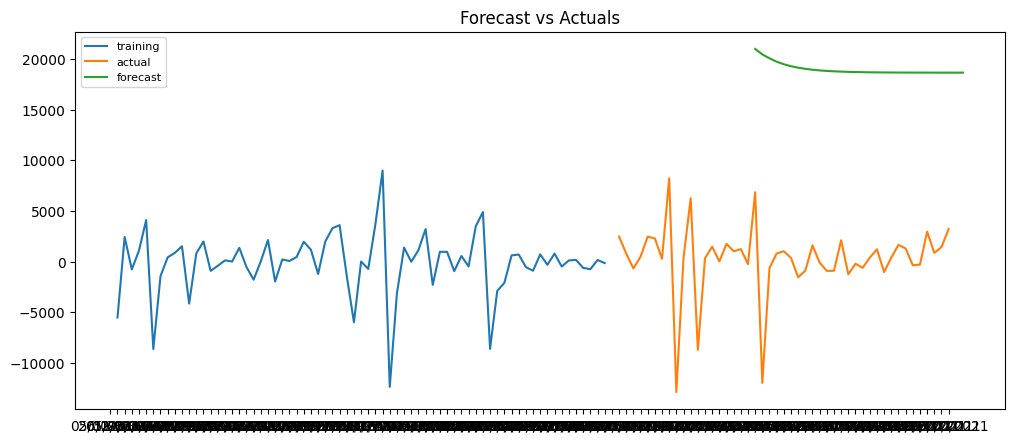

In [ ]:
fc=results.predict(90,119,dynamic=True)



# Make as pandas series
fc_series = pd.Series(fc)


# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.diff(), label='training')
plt.plot(test.diff(), label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()